In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

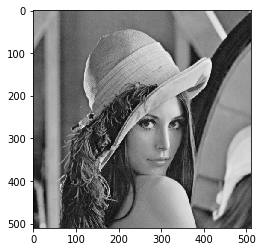

In [2]:
img = cv2.imread("lena.jpg", 0)

# split into 36 small images
TILES = 36

origin_height = img.shape[0]
origin_width = img.shape[1]

template_w = int(origin_width / 6)
template_h = int(origin_height / 6)

height = template_h * 6
width = template_w * 6
img = img.copy()[0:width,0:height]
plt.imshow(img, cmap='gray')


True

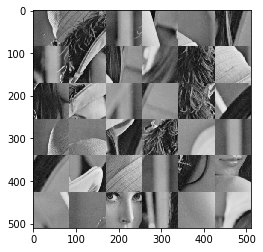

In [3]:
if len(np.shape(img)) == 3:
    channels = img.shape[2]
else:
    channels = 1

templates = [img[x:x+template_w,y:y+template_h] for y in range(0, height, template_h) for x in range(0, width, template_w)]

from random import seed
from random import randint
from random import sample

seed(1)

order = sample(range(TILES), TILES)

img_shuffled = img.copy()

for y in range(0, height, template_h):
    for x in range(0, width, template_w):
        template_index = int(x / template_w) + int(y / template_h) * 6
        img_shuffled[x:x+template_w,y:y+template_h] = templates[order[template_index]]

plt.imshow(img_shuffled, cmap='gray')
cv2.imwrite("lena_shuffled" + ".jpg", img_shuffled)

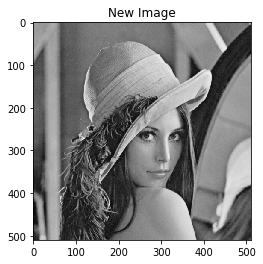

In [6]:
method = eval('cv2.TM_CCOEFF_NORMED')

img_gen = img_shuffled.copy()
tile_w = int(width / 6)
tile_h = int(height / 6)

for y in range(0, height, template_h):
    for x in range(0, width, template_w):
        tile = img.copy()[x:x+tile_w,y:y+tile_h]
        res = cv2.matchTemplate(img,tile,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        top_left = max_loc
        bottom_right = (top_left[0] + template_w, top_left[1] + template_h)
        x_tile, y_tile = int((top_left[0] + tile_w / 2) / tile_w), int((top_left[1] + tile_h / 2) / tile_h)

        img_gen[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = tile


plt.title('New Image')
plt.imshow(img_gen, cmap='gray')

cv2.imwrite("lena_remake" + ".jpg", img_gen)
plt.show()